In [24]:
import pandas as pd
import selenium
import seaborn as sns
import re
import matplotlib.pyplot as plt

In [3]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.chrome.options import Options
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.common.by import By


options = Options()
service = Service(ChromeDriverManager().install())
driver = webdriver.Chrome(service=service, options=options)

driver.get("https://www.cars24.com/buy-used-ford-cars-mumbai/?sort=bestmatch&serveWarrantyCount=true&storeCityId=2378")


In [4]:

Car_Name_year=driver.find_elements(By.CSS_SELECTOR,".sc-braxZu.kjFjan") #Extracing the car model year and name
car_name_year_text= [value.text for value in Car_Name_year]

#Segregating the year and car name from the variable car_name_year_text
Manuf_year=[]
Cars_names=[]

for i in range(0, len(car_name_year_text)):
    details=car_name_year_text[i]
    M_year= re.findall(r"\d{4}", details)
    Manuf_year.append(M_year)
    
    Car_name=re.findall(r"(\b[^\d{4}]\w+\b)", details)
    NAME = [name.strip() for name in Car_name]
    Cars = ' '.join(NAME)
    Cars_names.append(Cars)


In [5]:
Price_Car=driver.find_elements(By.CSS_SELECTOR,".sc-braxZu.cyPhJl") #Extracting price of car
car_details=driver.find_elements(By.CSS_SELECTOR,".sc-braxZu.kvfdZL") #Extracting all car details


#Transforming the price details for data analysis

prices=[value.text for value in Price_Car]
prices=[cleaned for cleaned in prices if cleaned.strip() and '₹' in cleaned]


#Extracting kilometres driven, fuel type and transmission from the raw data

Cars_details=[value.text for value in car_details]

Kilometers_Drive=[]
Fuel_Types=[]
Transmissions=[]

chunk_size=4
for i in range(0,len(Cars_details),4):
    chunks=Cars_details[i:i+chunk_size]
    Kilometers_Driven=chunks[0]
    Kilometers_Drive.append(Kilometers_Driven)
    Fuel_Type = chunks[1]
    Fuel_Types.append(Fuel_Type)
    Transmission=chunks[2]
    Transmissions.append(Transmission)


In [6]:
#Converting Kilometers Driven and prices into numericals so as to perform data analysis.

Car_kilo=[]
for km in Kilometers_Drive:
    km=km.replace("km",'').strip()
    km=km.lower()
    if km.endswith('k'):
        km=km.replace("k",'').strip()
        km=round(float(km)*1000)
        Car_kilo.append(km)
    elif km.endswith('l'):
        km=km.replace("l",'').strip()
        km=round(float(km)*100000)
        Car_kilo.append(km)

Kilometers_Drive= Car_kilo 


car_prices=[]

for price in prices:
    price= price.replace('₹','')
    if 'lakh' in price:
        price= price.replace('lakh','').strip()
        price= round(float(price)*100000)
        car_prices.append(price)
    
prices=car_prices


YEAR=[]
for y in Manuf_year:
    YR= int(y[0])
    YEAR.append(YR)

In [61]:
Ford_Car_info={"Name":Cars_names, "Kilometers Driven":Kilometers_Drive, 
               "Year of Manufacture":YEAR, "Fuel Type":Fuel_Types,
               "Transmission":Transmissions, "Price":prices }
Ford_Cars= pd.DataFrame(Ford_Car_info)

Ford_Cars

,Name,Kilometers Driven,Year of Manufacture,Fuel Type,Transmission,Price
0,Ford Ecosport,37970,2021,Petrol,Auto,695000
1,Ford Ecosport,27320,2016,Petrol,Auto,421000
2,Ford Ecosport,120000,2017,Diesel,Manual,510000
3,Ford New Figo,25460,2015,Petrol,Manual,240000
4,Ford Ecosport,70760,2020,Diesel,Manual,692000
...,...,...,...,...,...,...
67,Ford Ecosport,71740,2014,Diesel,Manual,507000
68,Ford Ecosport,28820,2016,Petrol,Auto,383000
69,Ford New Figo,62730,2015,Petrol,Manual,249000
70,Ford Ecosport,29370,2019,Petrol,Manual,477000


In [52]:
Ford_Cars.to_csv("Ford_cars_data",index=False)

In [53]:
Data_Ford_Cars= pd.read_csv("Ford_cars_data")

In [54]:
Data_Ford_Cars

,Name,Kilometers Driven,Year of Manufacture,Fuel Type,Transmission,Price
0,Ford Ecosport,37970,2021,Petrol,Auto,695000
1,Ford Ecosport,27320,2016,Petrol,Auto,421000
2,Ford Ecosport,120000,2017,Diesel,Manual,510000
3,Ford New Figo,25460,2015,Petrol,Manual,240000
4,Ford Ecosport,70760,2020,Diesel,Manual,692000
...,...,...,...,...,...,...
67,Ford Ecosport,71740,2014,Diesel,Manual,507000
68,Ford Ecosport,28820,2016,Petrol,Auto,383000
69,Ford New Figo,62730,2015,Petrol,Manual,249000
70,Ford Ecosport,29370,2019,Petrol,Manual,477000


Data Analysis

Data Cleaning

In [12]:
#Checking for missing Values
Data_Ford_Cars.isnull().sum()

Name                   0
Kilometers Driven      0
Year of Manufacture    0
Fuel Type              0
Transmission           0
Price                  0
dtype: int64

In [13]:
#Checking for duplicates
Data_Ford_Cars.duplicated().sum()

np.int64(0)

In [56]:
#Checking if the variables are assigned correct data types.
Data_Ford_Cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72 entries, 0 to 71
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Name                 72 non-null     object
 1   Kilometers Driven    72 non-null     int64 
 2   Year of Manufacture  72 non-null     int64 
 3   Fuel Type            72 non-null     object
 4   Transmission         72 non-null     object
 5   Price                72 non-null     int64 
dtypes: int64(3), object(3)
memory usage: 3.5+ KB


In [15]:
Data_Ford_Cars.describe()

,Kilometers Driven,Price
count,72.000000,72.000000
mean,74399.861111,356166.666667
std,39189.018241,169173.134084
min,11550.000000,70000.000000
25%,46715.000000,246750.000000
50%,69170.000000,340500.000000
75%,94257.500000,437500.000000
max,220000.000000,764000.000000


<Axes: xlabel='Price', ylabel='Count'>

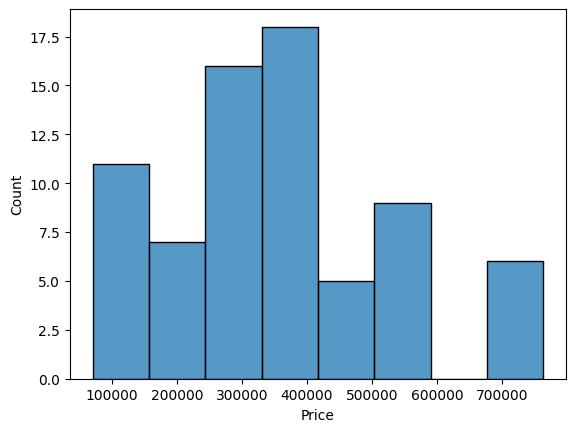

In [16]:
sns.histplot(Data_Ford_Cars['Price'])

In [29]:
Var=["Name","Fuel Type","Transmission"]
for i in Var:
    Maximum_count=Data_Ford_Cars[i].value_counts().idxmax()
    print(i,":",Maximum_count)
    
    

Name : Ford Ecosport
Fuel Type : Petrol
Transmission : Manual


<Axes: xlabel='Year of Manufacture', ylabel='Count'>

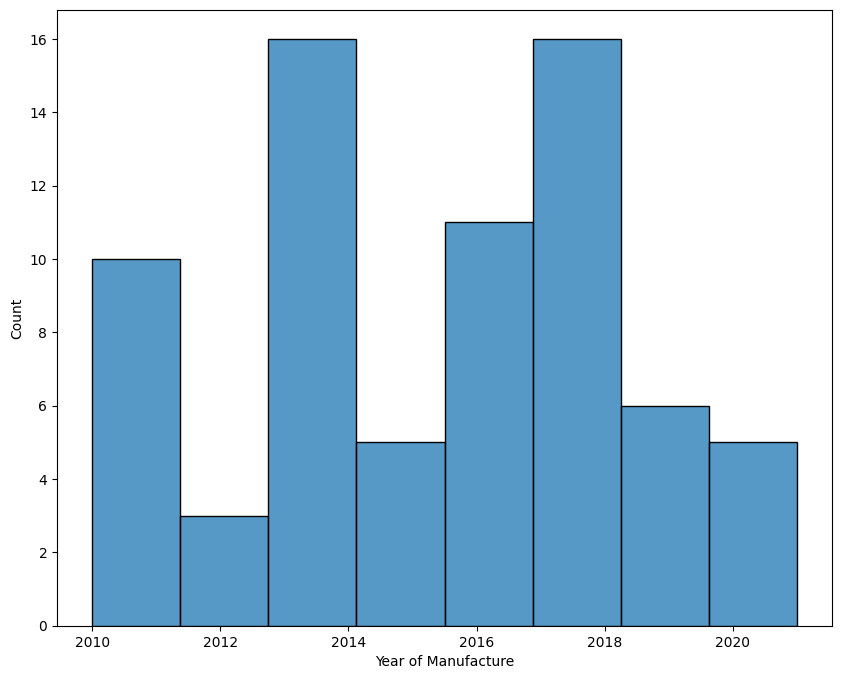

In [62]:
plt.figure(figsize=(10,8))
sns.histplot(Data_Ford_Cars['Year of Manufacture'])


<Axes: xlabel='Year of Manufacture', ylabel='Price'>

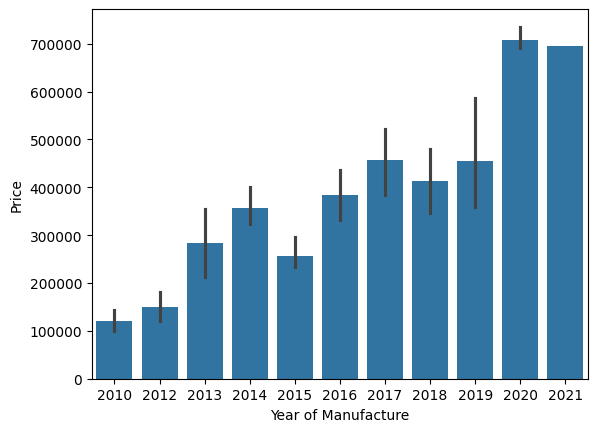

In [63]:


sns.barplot(x=Data_Ford_Cars['Year of Manufacture'], y=Data_Ford_Cars['Price'])


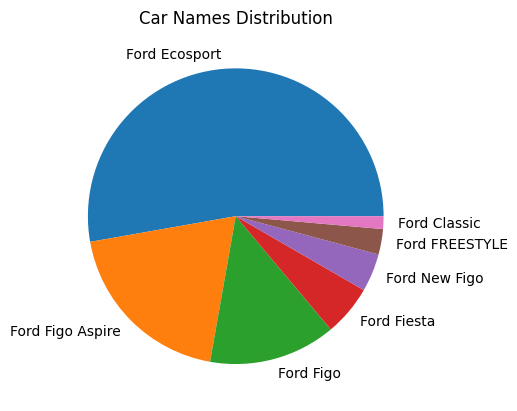

In [68]:
Name_count=Data_Ford_Cars["Name"].value_counts()

plt.pie(Name_count, labels=Name_count.index)
plt.title('Car Names Distribution')
plt.show()

In [90]:
from datetime import datetime

Present_year = datetime.now().year

Data_Ford_Cars['Car_age']= Present_year-Data_Ford_Cars['Year of Manufacture']


In [75]:
Data_Ford_Cars['Car_age'].corr(Data_Ford_Cars['Price'])

np.float64(-0.800353867859351)

In [85]:
correlation_analysis= Data_Ford_Cars[['Price', 'Year of Manufacture','Car_age']].corr()

In [86]:
correlation_analysis


,Price,Year of Manufacture,Car_age
Price,1.000000,0.800354,-0.800354
Year of Manufacture,0.800354,1.000000,-1.000000
Car_age,-0.800354,-1.000000,1.000000


<Axes: >

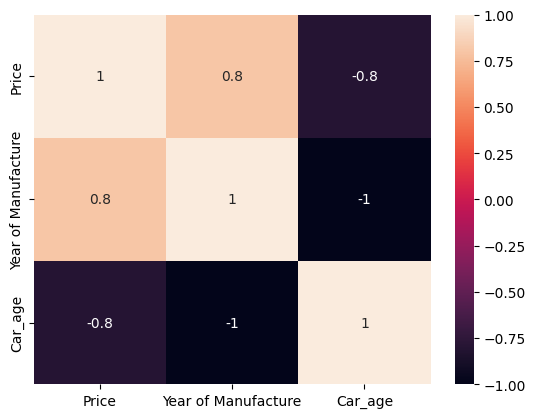

In [89]:
sns.heatmap(correlation_analysis, annot=True)